In [4]:
import os
import sys
from itertools import product
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from src.models.train_model import BTCForecasting

from src.utils.constants import *
from src.utils.utils import *
from src.visualization.visualize import *

import pickle

In [2]:
merged_data = {
    (exchange, data_type): pd.read_parquet(
        os.path.join(INTERIM_DATA_PATH, f'{exchange}_{data_type}_merged.parquet')
    )
    for exchange, data_type in product(EXCHANGES, DATA_TYPES)
}
merged_data[(ALL, UNIFIED)] = pd.read_parquet(os.path.join(INTERIM_DATA_PATH, f'{ALL}_{UNIFIED}_merged.parquet'))

In [8]:
# Training params

view_params = {
    'candles': {
        'use_smoteenn': False,
        'use_rfe': False,
        'criteria': ['gini', 'entropy'],
        'max_depth_range': range(3, 10),
        'min_samples_leaf_range': range(1, 5),
        'min_samples_split_range': range(2, 10),
        'max_leaf_nodes': [10, 20, 50, 100],
        'factor': 3,
        'aggresive_elimination': False,
        'n_splits': 10,
    },
    'orderbook': {
        'use_smoteenn': False,
        'use_rfe': False,
        'criteria': ['gini', 'entropy'],
        'max_depth_range': range(3, 10),
        'min_samples_leaf_range': range(1, 5),
        'min_samples_split_range': range(2, 10),
        'max_leaf_nodes': [10, 20, 50, 100],
        'factor': 3,
        'aggresive_elimination': False,
        'n_splits': 10,
    },
    'unified': {
        'use_smoteenn': False,
        'use_rfe': False,
        'criteria': ['gini', 'entropy'],
        'max_depth_range': range(3, 10),
        'min_samples_leaf_range': range(1, 5),
        'min_samples_split_range': range(2, 10),
        'max_leaf_nodes': [10, 20, 50, 100],
        'factor': 3,
        'aggresive_elimination': False,
        'n_splits': 10,
    }
}

In [4]:
# Training

btcfs = {}

for (exchange, data_type), df in merged_data.items():

    for key, value in view_params[data_type].items():
        exec(f"{key} = {value}")
    
    print(f"\nBest DTC model for {exchange} - {data_type}")

    classifier = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')

    btcf = BTCForecasting(n_splits=n_splits, smoteenn=use_smoteenn, rfe=use_rfe)
    btcf.set_data(df)

    model_params = {
        'classifier__criterion': criteria,
        'classifier__max_depth': max_depth_range,
        'classifier__min_samples_leaf': min_samples_leaf_range,   
        'classifier__min_samples_split': min_samples_split_range,
        'classifier__max_leaf_nodes': max_leaf_nodes
    }
    btcf.train_model(classifier, model_params, factor=factor, aggressive_elimination=aggresive_elimination)
    btcfs[(exchange, data_type)] = btcf

    # Save the best model and results
    model_path = os.path.join(MODELS_DATA_PATH, f"{exchange}_{data_type}_dtc_model.pkl")

    with open(model_path, "wb") as f:
        pickle.dump(btcf, open(model_path, "wb"))

del(merged_data)


Best DTC model for BINANCE - candles
n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 573
max_resources_: 418344
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1792
n_resources: 573
Fitting 10 folds for each of 1792 candidates, totalling 17920 fits
----------
iter: 1
n_candidates: 598
n_resources: 1719
Fitting 10 folds for each of 598 candidates, totalling 5980 fits
----------
iter: 2
n_candidates: 200
n_resources: 5157
Fitting 10 folds for each of 200 candidates, totalling 2000 fits
----------
iter: 3
n_candidates: 67
n_resources: 15471
Fitting 10 folds for each of 67 candidates, totalling 670 fits
----------
iter: 4
n_candidates: 23
n_resources: 46413
Fitting 10 folds for each of 23 candidates, totalling 230 fits
----------
iter: 5
n_candidates: 8
n_resources: 139239
Fitting 10 folds for each of 8 candidates, totalling 80 fits
----------
iter: 6
n_candidates: 3
n_resources: 417717
Fitting 10 folds for each of 3 candidates, t

In [6]:
btcfs = {
    (exchange, data_type): pd.read_pickle(
        os.path.join(MODELS_DATA_PATH, f"{exchange}_{data_type}_dtc_model.pkl")
    )
    for exchange, data_type in product(EXCHANGES, DATA_TYPES)
}
btcfs[(ALL, UNIFIED)] = pd.read_pickle(os.path.join(MODELS_DATA_PATH, f'{ALL}_{UNIFIED}_dtc_model.pkl'))

Best DTC model for BINANCE - candles
Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__max_leaf_nodes': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 8}
Best score: 0.4952994153894769
Confusion matrix:


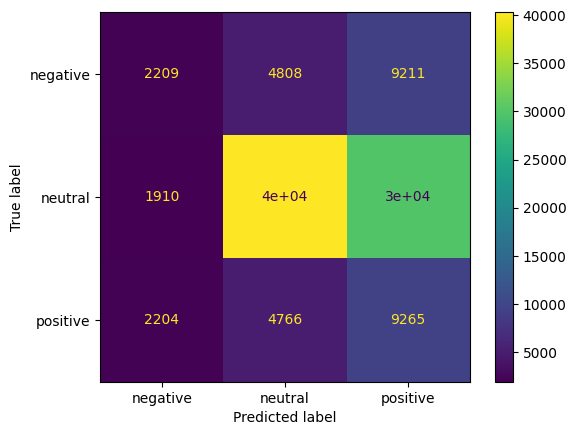

<Figure size 640x480 with 0 Axes>

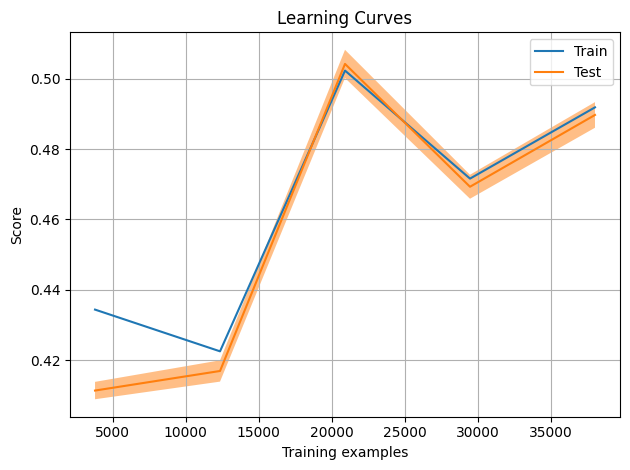

<Figure size 640x480 with 0 Axes>

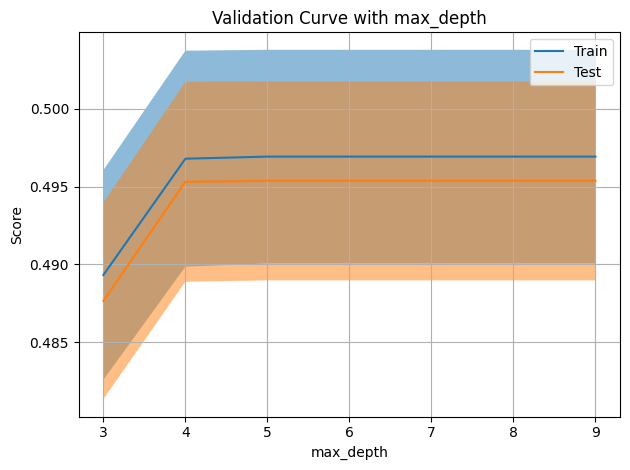

Best DTC model for BINANCE - orderbook
Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 9, 'classifier__max_leaf_nodes': 100, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 6}
Best score: 0.5045875007226687
Confusion matrix:


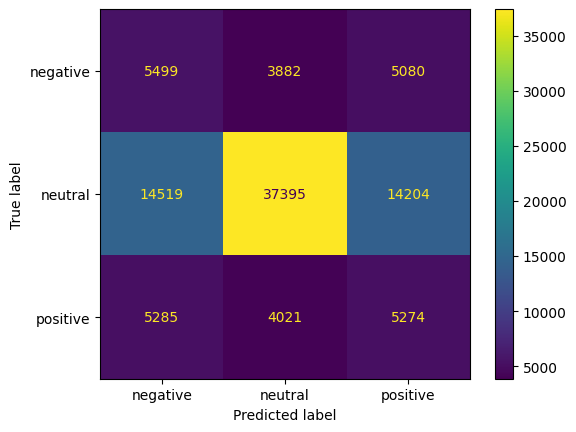

<Figure size 640x480 with 0 Axes>

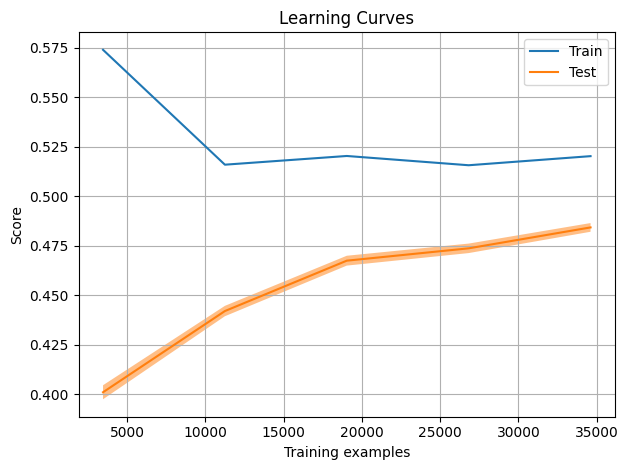

<Figure size 640x480 with 0 Axes>

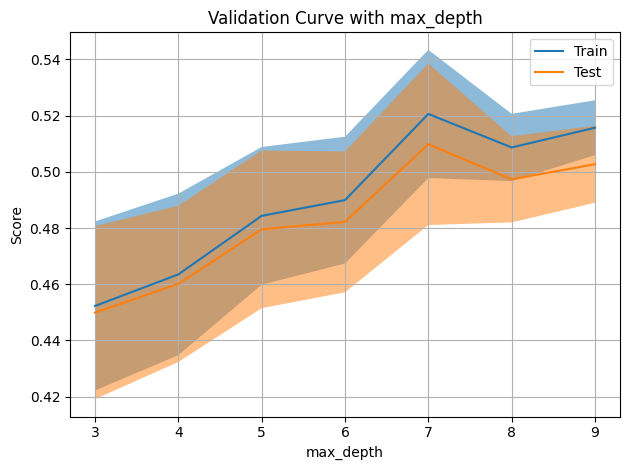

Best DTC model for BINANCE - unified
Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 6, 'classifier__max_leaf_nodes': 100, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6}
Best score: 0.5227293750361335
Confusion matrix:


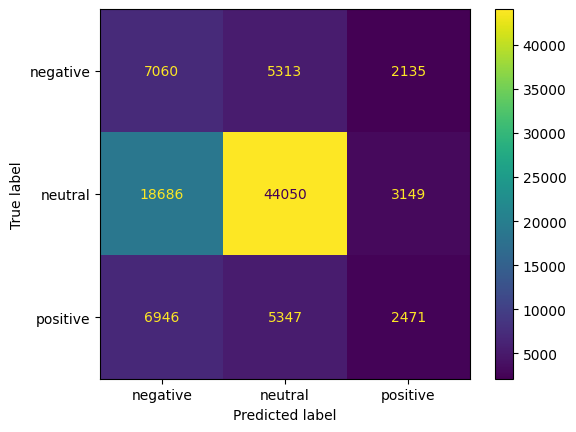

<Figure size 640x480 with 0 Axes>

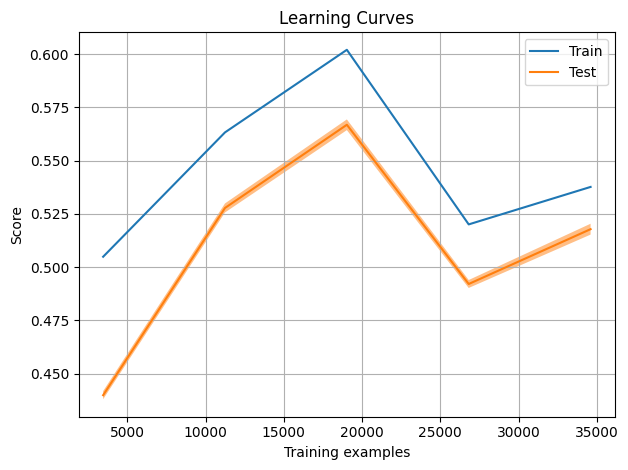

<Figure size 640x480 with 0 Axes>

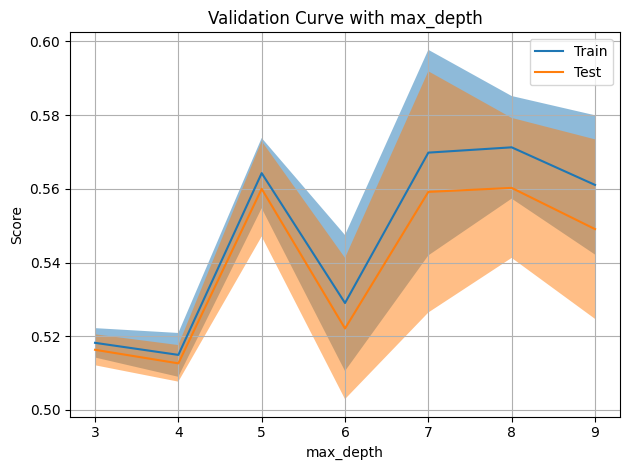

Best DTC model for HUOBI - candles
Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 9, 'classifier__max_leaf_nodes': 100, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 6}
Best score: 0.5324177687351644
Confusion matrix:


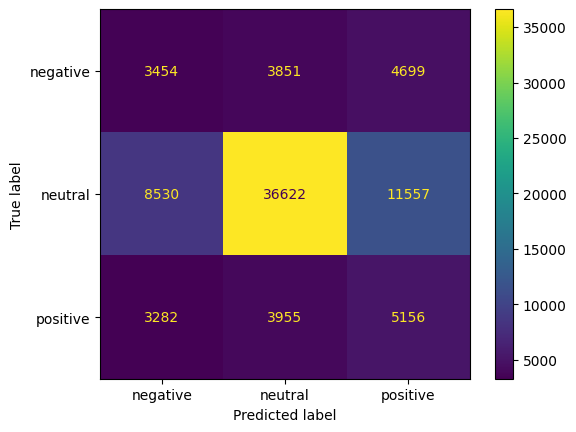

<Figure size 640x480 with 0 Axes>

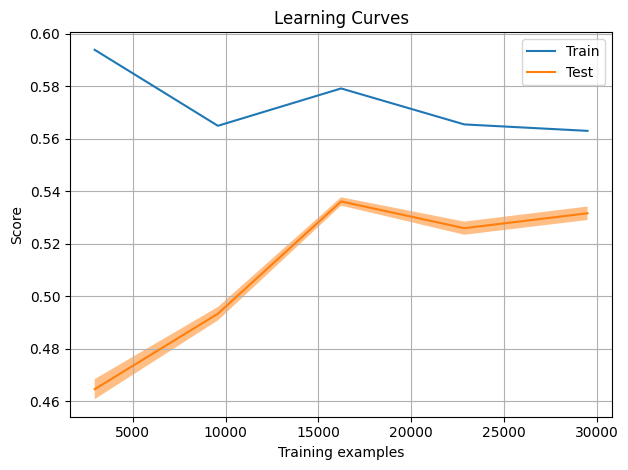

<Figure size 640x480 with 0 Axes>

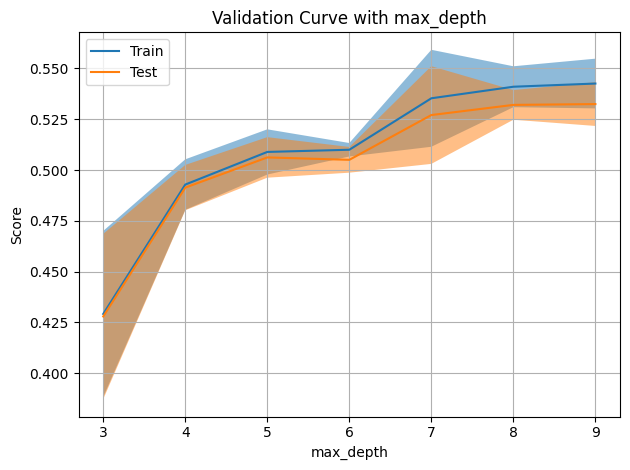

Best DTC model for HUOBI - orderbook
Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__max_leaf_nodes': 100, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best score: 0.524399072680685
Confusion matrix:


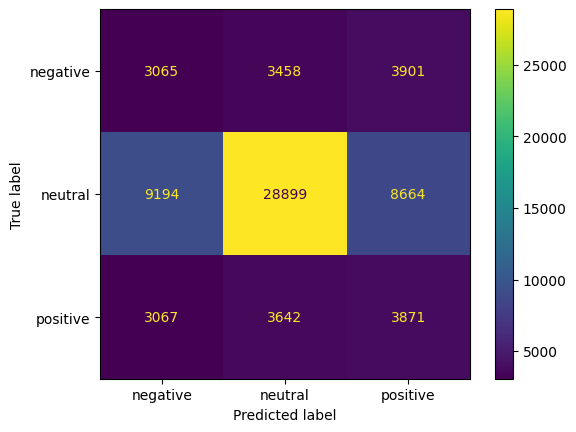

<Figure size 640x480 with 0 Axes>

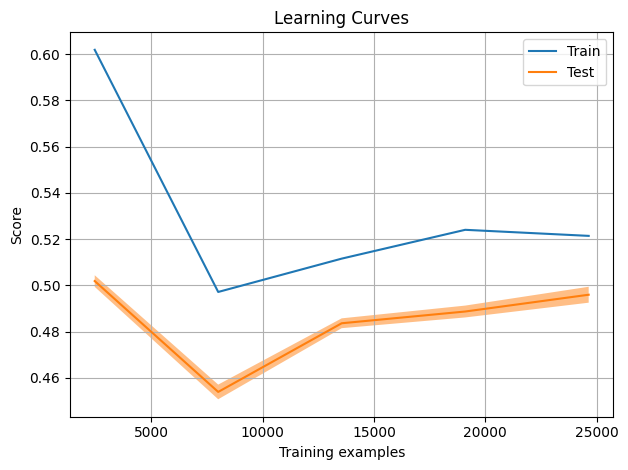

<Figure size 640x480 with 0 Axes>

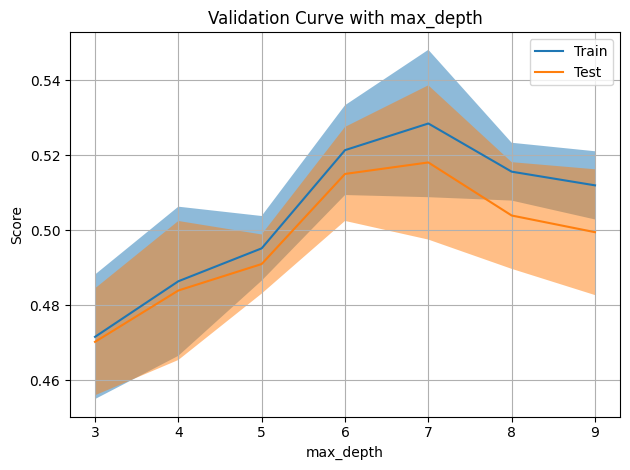

Best DTC model for HUOBI - unified
Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best score: 0.5358685484198966
Confusion matrix:


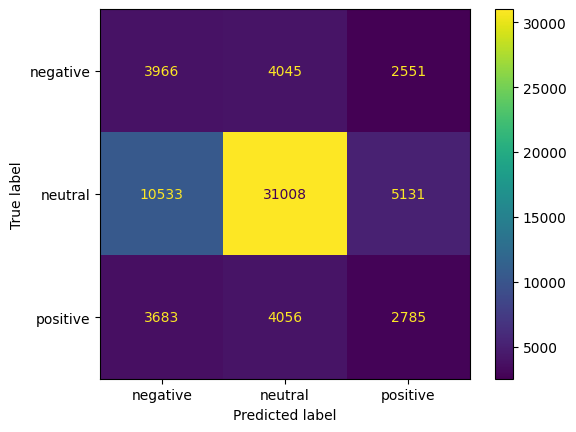

<Figure size 640x480 with 0 Axes>

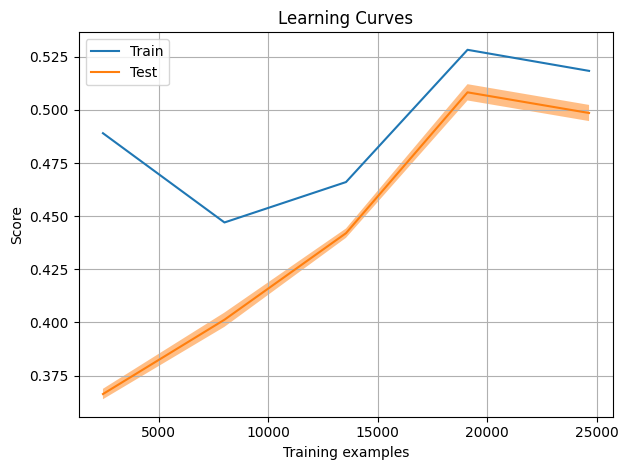

<Figure size 640x480 with 0 Axes>

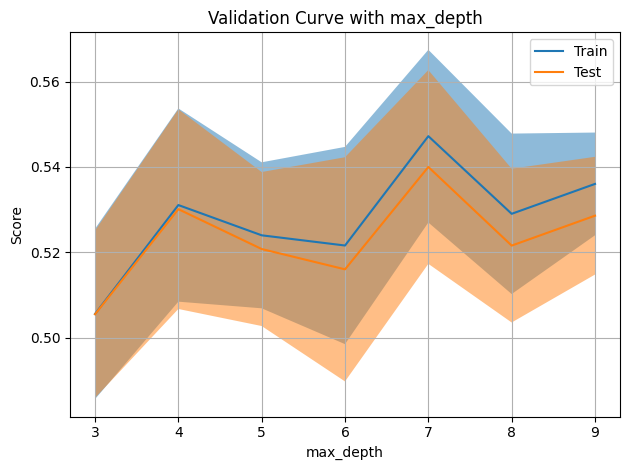

Best DTC model for OKX - candles
Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 8}
Best score: 0.5486647591797806
Confusion matrix:


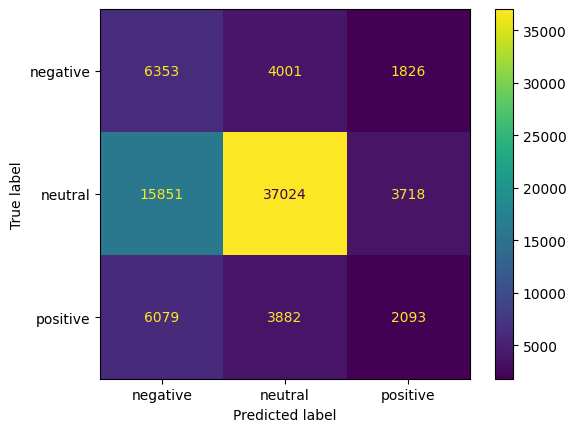

<Figure size 640x480 with 0 Axes>

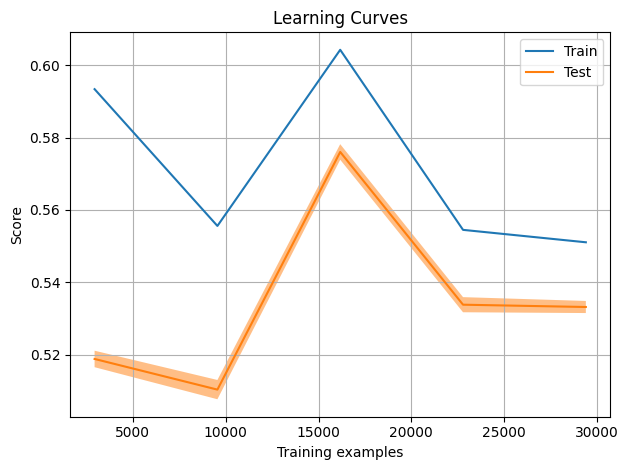

<Figure size 640x480 with 0 Axes>

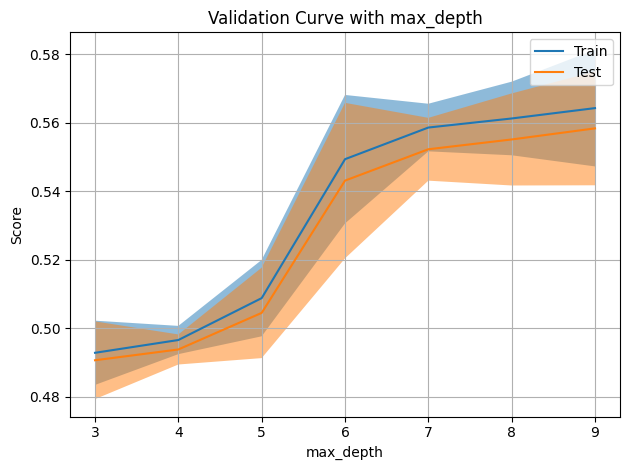

Best DTC model for OKX - orderbook
Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__max_leaf_nodes': 50, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 3}
Best score: 0.4808323975294778
Confusion matrix:


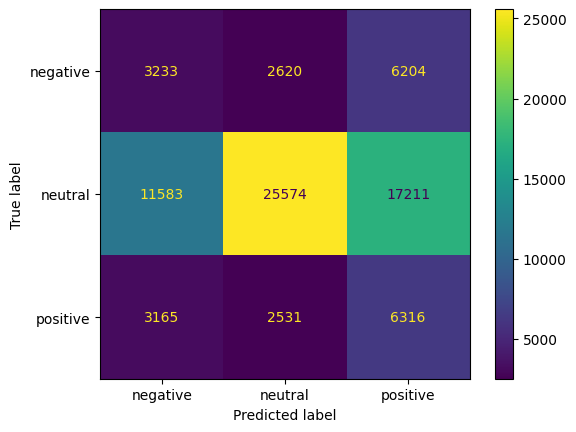

<Figure size 640x480 with 0 Axes>

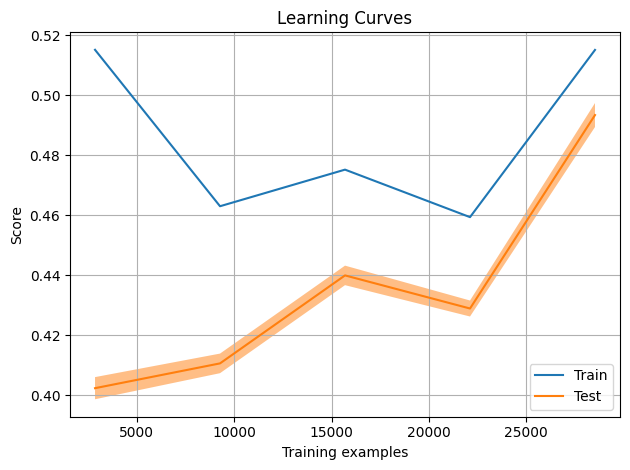

<Figure size 640x480 with 0 Axes>

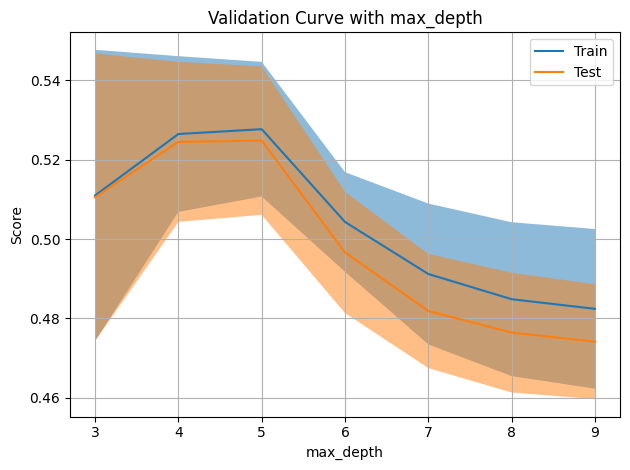

Best DTC model for OKX - unified
Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__max_leaf_nodes': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 4}
Best score: 0.5375800211044671
Confusion matrix:


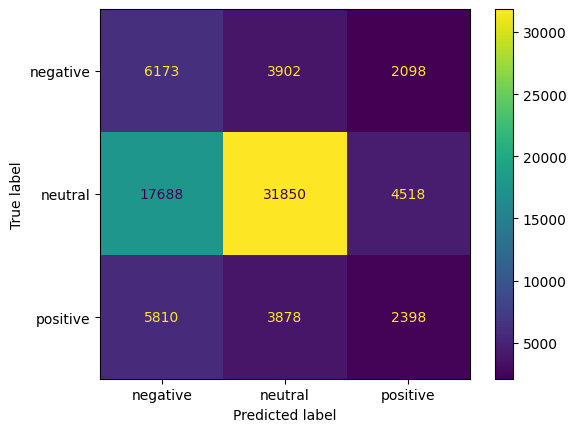

<Figure size 640x480 with 0 Axes>

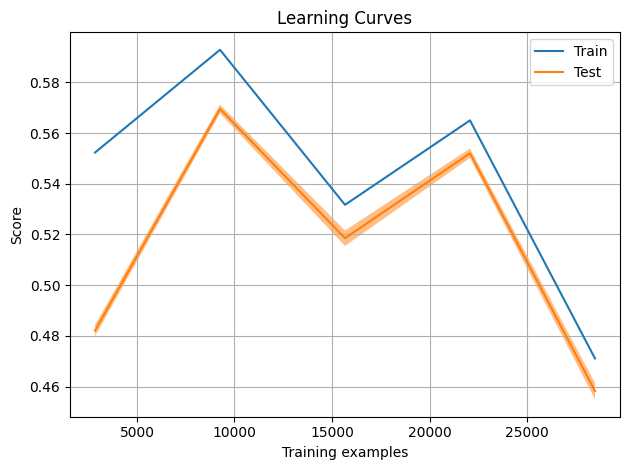

<Figure size 640x480 with 0 Axes>

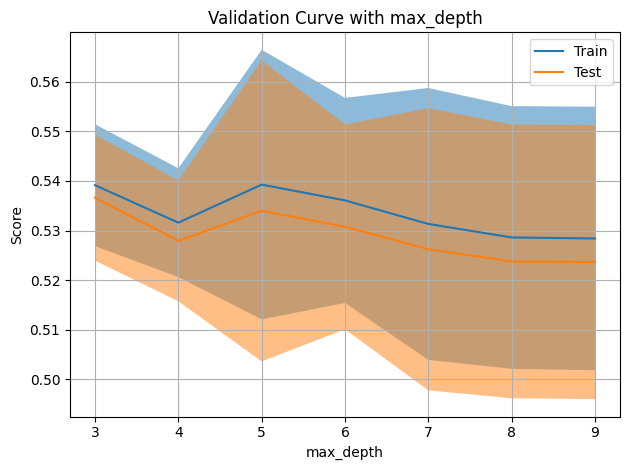

Best DTC model for ALL - unified
Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 9, 'classifier__max_leaf_nodes': 100, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6}
Best score: 0.5209988928527494
Confusion matrix:


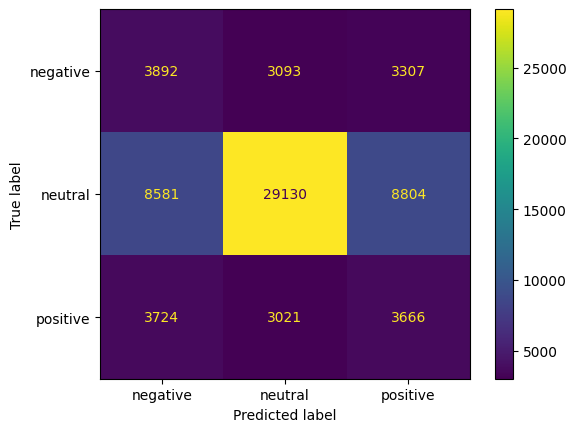

<Figure size 640x480 with 0 Axes>

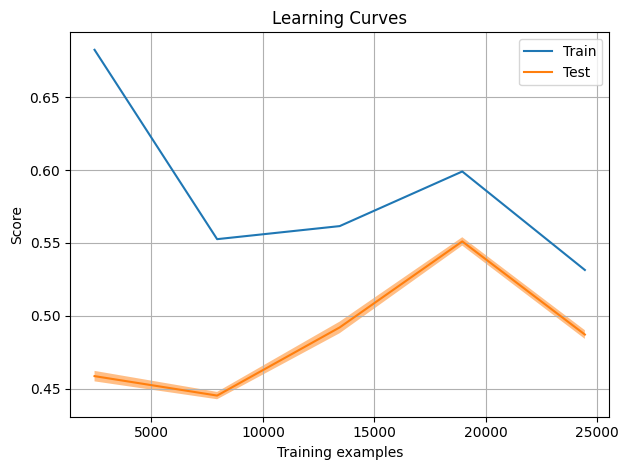

<Figure size 640x480 with 0 Axes>

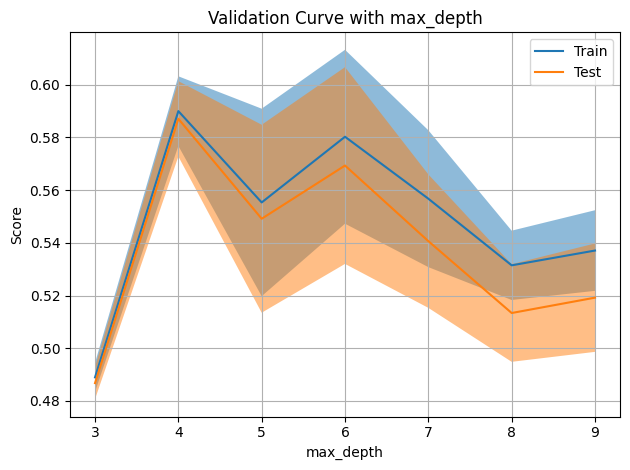

In [9]:
# Evaluation

for (exchange, data_type), btcf in btcfs.items():
        print(f"Best DTC model for {exchange} - {data_type}")

        btcf.evaluate_model()

        print(f"Parameters: {btcf.results['best_params']}")
        print(f"Best score: {btcf.results['best_score']}")

        # btcf.evaluate_model()

        print(f"Confusion matrix:")
        plot_confusion_matrix(confusion_matrix=btcf.results['conf_matrix'], display_labels=list(btcf.le.classes_))

        # Plots
        if(btcf.rfe):
                btcf.plot_feature_importance(f"{exchange}_{data_type}_dtc_feature_importance.png")
        btcf.plot_learning_curves(f"{exchange}_{data_type}_dtc_learning_curve.png")
        btcf.plot_validation_curves('max_depth', view_params[data_type]['max_depth_range'], f"{exchange}_{data_type}_dtc_validation_curve_max_depth.png")

In [10]:
# Evaluation results

eval_results = []
for (exchange, data_type), model in btcfs.items():

    result = {
        'exchange': exchange,
        'data_type': data_type,
        'accuracy': model.results.get('accuracy'),
        'mean_test_score': model.results['cv_results']['mean_test_score'],
        'mean_fit_time': model.results['cv_results']['mean_fit_time'],
        'mean_score_time': model.results['cv_results']['mean_score_time'],
        'mean_train_score': model.results['cv_results']['mean_train_score']
    }
    best_params = model.results.get('best_params')
    result.update(best_params)
    eval_results.append(result)

eval_results_df = pd.DataFrame(eval_results)
display(eval_results_df)


,exchange,data_type,accuracy,mean_test_score,mean_fit_time,mean_score_time,mean_train_score,classifier__criterion,classifier__max_depth,classifier__max_leaf_nodes,classifier__min_samples_leaf,classifier__min_samples_split
0,BINANCE,candles,0.495191,"[0.44038461538461543, 0.44038461538461543, 0.4...","[0.8607956171035767, 0.16931867599487305, 0.00...","[0.0017005681991577148, 0.0011502504348754883,...","[0.6183028083028083, 0.6183028083028083, 0.618...",entropy,4,10,4,8
1,BINANCE,orderbook,0.506184,"[0.2765957446808511, 0.27446808510638293, 0.27...","[0.022153902053833007, 0.021853876113891602, 0...","[0.0014502525329589844, 0.001500415802001953, ...","[0.4956164967077365, 0.49348883713326835, 0.49...",gini,9,100,4,6
2,BINANCE,unified,0.563080,"[0.3851063829787234, 0.3851063829787234, 0.382...","[0.0244046688079834, 0.023404145240783693, 0.0...","[0.0017502546310424806, 0.0016504526138305664,...","[0.5671551776577409, 0.5666260771286404, 0.562...",gini,6,100,1,6
3,HUOBI,candles,0.557690,"[0.3775, 0.3775, 0.3775, 0.38249999999999995, ...","[0.007901263236999512, 0.006701111793518066, 0...","[0.001250314712524414, 0.0011003732681274414, ...","[0.561918109344955, 0.5606681093449551, 0.5606...",gini,9,100,2,6
4,HUOBI,orderbook,0.528844,"[0.3545454545454546, 0.3545454545454546, 0.354...","[0.01505284309387207, 0.014052605628967286, 0....","[0.0019003629684448242, 0.0014001846313476563,...","[0.6025969436077098, 0.6025969436077098, 0.602...",entropy,7,100,1,2
5,HUOBI,unified,0.557263,"[0.4, 0.4, 0.4, 0.4, 0.4, 0.3848484848484849, ...","[0.01795334815979004, 0.018303394317626953, 0....","[0.0014502286911010742, 0.002454853057861328, ...","[0.5984615846991259, 0.5984615846991259, 0.598...",gini,7,50,1,2
6,OKX,candles,0.562560,"[0.48, 0.48, 0.48, 0.48, 0.47750000000000004, ...","[0.00665135383605957, 0.005600929260253906, 0....","[0.0012502193450927735, 0.0012002944946289062,...","[0.5895304018403345, 0.5895304018403345, 0.589...",entropy,7,50,1,8
7,OKX,orderbook,0.447786,"[0.3051282051282051, 0.3051282051282051, 0.307...","[0.017902827262878417, 0.01615281105041504, 0....","[0.0013004541397094727, 0.0013503074645996095,...","[0.5664987789987791, 0.5664987789987791, 0.565...",gini,8,50,3,3
8,OKX,unified,0.516134,"[0.37105263157894736, 0.37105263157894736, 0.3...","[0.018703293800354005, 0.018753314018249513, 0...","[0.0015504837036132812, 0.0014001846313476563,...","[0.5426790801790802, 0.5426790801790802, 0.542...",gini,5,20,1,4
9,ALL,unified,0.545806,"[0.39999999999999997, 0.39999999999999997, 0.3...","[0.06051084995269775, 0.050059151649475095, 0....","[0.0019504308700561523, 0.0021006107330322266,...","[0.6480853591373806, 0.6480853591373806, 0.648...",gini,9,100,1,6


In [11]:
# Performing t-tests for each metric
metrics = ['mean_test_score', 'mean_fit_time', 'mean_score_time', 'mean_train_score']
ttest_results = pd.concat([perform_ttest(eval_results_df, metric) for metric in metrics], ignore_index=True)

display(ttest_results)


,data_type,exchange1,exchange2,metric,t_stat,p_value
0,candles,BINANCE,HUOBI,mean_test_score,40.460989,1.301274e-308
1,candles,BINANCE,OKX,mean_test_score,-6.907010,5.587031e-12
2,candles,HUOBI,OKX,mean_test_score,-41.147134,0.000000e+00
3,orderbook,BINANCE,HUOBI,mean_test_score,-27.801572,1.044710e-157
4,orderbook,BINANCE,OKX,mean_test_score,-29.790885,2.907231e-178
5,orderbook,HUOBI,OKX,mean_test_score,-1.727751,8.409053e-02
6,unified,BINANCE,HUOBI,mean_test_score,12.371268,1.181428e-34
7,unified,BINANCE,OKX,mean_test_score,0.326462,7.440874e-01
8,unified,BINANCE,ALL,mean_test_score,-13.556039,3.452155e-41
9,unified,HUOBI,OKX,mean_test_score,-11.464155,4.513434e-30


In [12]:
# Compare mean test scores between different exchanges for the same data type using bootstrapping
def compute_comparison(df, data_type):
    results_list = []
    
    df_filtered = df[df['data_type'] == data_type]
    
    exchanges = df_filtered['exchange'].unique()
    for i in range(len(exchanges)):
        for j in range(i + 1, len(exchanges)):
            exchange1 = exchanges[i]
            exchange2 = exchanges[j]
            
            scores1 = df_filtered[df_filtered['exchange'] == exchange1]['mean_test_score'].explode().dropna().astype(float)
            scores2 = df_filtered[df_filtered['exchange'] == exchange2]['mean_test_score'].explode().dropna().astype(float)
            
            bootstrap_means1 = bootstrap(scores1)
            bootstrap_means2 = bootstrap(scores2)
            
            lower1, upper1 = np.percentile(bootstrap_means1, [2.5, 97.5])
            lower2, upper2 = np.percentile(bootstrap_means2, [2.5, 97.5])
            
            diff_means = np.array(bootstrap_means1) - np.array(bootstrap_means2)
            lower_diff, upper_diff = np.percentile(diff_means, [2.5, 97.5])
            
            results_list.append({
                'data_type': data_type,
                'exchange1': exchange1,
                'exchange2': exchange2,
                'exchange1_mean_lower': lower1,
                'exchange1_mean_upper': upper1,
                'exchange2_mean_lower': lower2,
                'exchange2_mean_upper': upper2,
                'mean_diff_lower': lower_diff,
                'mean_diff_upper': upper_diff,
                'exchange1_ci_percentage': (upper1 - lower1) / abs(lower1) * 100,
                'exchange2_ci_percentage': (upper2 - lower2) / abs(lower2) * 100,
                'mean_diff_ci_percentage': (upper_diff - lower_diff) / abs(lower_diff) * 100
            })
    
    return pd.DataFrame(results_list)

In [13]:
from sklearn.utils import resample

def bootstrap(data, n_iterations=1000, sample_size=None):
    if sample_size is None:
        sample_size = len(data)
    means = []
    for _ in range(n_iterations):
        sample = resample(data, n_samples=sample_size)
        means.append(np.mean(sample))
    return means

In [14]:
# Results comparison

data_types = eval_results_df['data_type'].unique()
all_comparisons = pd.concat([compute_comparison(eval_results_df, data_type) for data_type in data_types], ignore_index=True)

display(all_comparisons)

,data_type,exchange1,exchange2,exchange1_mean_lower,exchange1_mean_upper,exchange2_mean_lower,exchange2_mean_upper,mean_diff_lower,mean_diff_upper,exchange1_ci_percentage,exchange2_ci_percentage,mean_diff_ci_percentage
0,candles,BINANCE,HUOBI,0.450846,0.452888,0.413404,0.416366,0.035289,0.038722,0.453129,0.716549,9.728058
1,candles,BINANCE,OKX,0.450882,0.452915,0.456684,0.459646,-0.008089,-0.004499,0.450943,0.648507,44.382995
2,candles,HUOBI,OKX,0.413314,0.416305,0.456746,0.459671,-0.045467,-0.041308,0.723888,0.640366,9.148182
3,orderbook,BINANCE,HUOBI,0.354490,0.359214,0.397538,0.401069,-0.045254,-0.039357,1.332696,0.888320,13.031130
4,orderbook,BINANCE,OKX,0.354378,0.359434,0.399858,0.402866,-0.047318,-0.041413,1.426867,0.752253,12.479326
5,orderbook,HUOBI,OKX,0.397487,0.401018,0.399752,0.402917,-0.004289,0.000208,0.888491,0.791590,104.857155
6,unified,BINANCE,HUOBI,0.436863,0.439895,0.421417,0.425050,0.012545,0.017524,0.694097,0.862235,39.685555
7,unified,BINANCE,OKX,0.437062,0.439874,0.436423,0.439693,-0.001749,0.002522,0.643200,0.749088,244.178691
8,unified,BINANCE,ALL,0.436936,0.439882,0.451610,0.454572,-0.016661,-0.012661,0.674134,0.655935,24.012297
9,unified,HUOBI,OKX,0.421355,0.425053,0.436478,0.439692,-0.017315,-0.012354,0.877473,0.736246,28.650044
